<font size="5">
 <div class="alert alert-block alert-info"><b>Master in Data Science - Iscte <b>
     </div>
</font> 
 
 
     
    
  <font size="5"> OEOD </font>
  
  
  
  <font size="3"> **Diana Aldea Mendes**, September 2023 </font>
  
   
  <font size="3"> *diana.mendes@iscte-iul.pt* </font> 
  
    
 
  
    
  <font color='blue'><font size="5"> <b>Week 2 - Markov Processes and Grid World RL<b></font></font>
  

# Basic overview

From [wiki](https://en.wikipedia.org/wiki/Reinforcement_learning): 

- **Reinforcement learning (RL)** is an area of machine learning concerned with how intelligent agents ought to take actions in an environment in order to maximize the notion of cumulative reward.*

- The 4 main components of any RL algorithm are therefore the following:

* `Agent` - an entity (computer program) that makes decisions. 

* `Action` - decision made by an agent. 

* `Environment` - an interface for the agents to interact with. The environment accepts actions and responds with the result and a new set of observations. 

* `Reward` - a function that assigns a value (reward) for each action that an agent can take. 



## MDP

- In an MDP, we can define three sets: 

$\mathbb{S}$ - the set of all possible states 

$\mathbb{A}$ - the set of all possible actions

$\mathbb{R}$ - the set of all possible rewards

Then, the dynamics of an MDP process can be defined as a probability: 

$p(s^{*}, r| s, a) = P(S_{t} = s^{*}, R_{t} = r | S_{t-1} = s, A_{t-1}=a)$

$S_{t} \in \mathbb{S}, R_{t} \in \mathbb{R}, A_{t} \in \mathbb{A}$  $\forall t$

- Because we are dealing with probabilities, then: 

$$ \sum_{s^{*} \in \mathbb{S}} \sum_{r \in \mathbb{R}} p(s^{*}, r| s, a) = 1 $$


## Returns and rewards

- The reward hypothesis states that: 

> The goal of an agent is to maximize the expected total reward it receives over the course of its lifetime.

- The expected return at time step $t$ is denoted as: 

$$G_{t} = R_{t+1} + R_{t+2} + ... + R_{T}$$ 

Where $T$ is the terminal time step when the episode ends. 

- When there is no clear ending to the episode, the return is defined as:

$$G_{t} = R_{t+1} + \gamma R_{t+2} + \gamma^{2} R_{t+3} + ...$$

Where $\gamma \in [0, 1]$ is a discount factor.

## Policies and value functions 

- A policy is a mapping (denoted as $\pi$) from states to probabilities of taking a certain action.

$$ \pi : \mathbb{S} \rightarrow \mathbb{A}$$ 

Or 

$$ \pi(a \in \mathbb{A}| s \in \mathbb{S}) \in [0, 1] $$

- The value function of a state $s$ under a policy $\pi$, denoted $v_{\pi}(s)$, is the expected return when starting in s and following $\pi$ thereafter. The full definition is: 

$$ v_{\pi} (s) = \mathbb{E}_{\pi} \left[ G_{t} | S_{t} = s\right] =  \mathbb{E}_{\pi} \left[\sum_{k = 0}^{\infty}R_{t + k + 1} \gamma^{k} | S_{t} = s\right]$$

- The action value function, which assigns a value to taking an action $a$ in a state $s$ under a policy $\pi$, is denoted $q_{\pi}(s, a)$. The full definition is:

$$ q_{\pi} (s, a) = \mathbb{E}_{\pi} \left[ G_{t} | S_{t} = s, A_{t} = a\right] =  \mathbb{E}_{\pi} \left[\sum_{k = 0}^{\infty}R_{t + k + 1} \gamma^{k} | S_{t} = s, A_{t} = a\right]$$

- The Bellman equation for state value function is: 

$$ v_{\pi}(s) = \sum_{a \in \mathbb{A}} \pi(a|s) \sum_{s^{*} \in \mathbb{S}} \sum_{r \in \mathbb{R}} p(s^{*}, r| s, a) \left[ r + \gamma v_{\pi}(s^{*}) \right] $$

Here 

$s^{*}$ - the next state from the current state $s$. 

- The equation states that the value of a state is the `sum of the expected return of all possible actions taken in that state`. 
- The Belman equation also has a recursive property. 


# Example - Markov chain

In [1]:
# import numpy library to do vector algebra
import numpy as np

# define a transition matrix
P = np.array([[0.3, 0.7], [0.2, 0.8]])
print("Transition Matrix:\n", P)

# define any starting solution to state probabilities
# Here we assume equal probabilities for all the states
S = np.array([0.5, 0.5])

# run through 10 iterations to calculate steady state
# transition probabilities
for i in range(10):
    S = np.dot(S, P)
    print("\nIter {0}. Probability vector S = {1}".format(i, S))
print("\nFinal Vector S={0}".format(S))

Transition Matrix:
 [[0.3 0.7]
 [0.2 0.8]]

Iter 0. Probability vector S = [0.25 0.75]

Iter 1. Probability vector S = [0.225 0.775]

Iter 2. Probability vector S = [0.2225 0.7775]

Iter 3. Probability vector S = [0.22225 0.77775]

Iter 4. Probability vector S = [0.222225 0.777775]

Iter 5. Probability vector S = [0.2222225 0.7777775]

Iter 6. Probability vector S = [0.22222225 0.77777775]

Iter 7. Probability vector S = [0.22222223 0.77777778]

Iter 8. Probability vector S = [0.22222222 0.77777778]

Iter 9. Probability vector S = [0.22222222 0.77777778]

Final Vector S=[0.22222222 0.77777778]


In [2]:
#the following code takes a list such as
#[1,1,2,6,8,5,5,7,8,8,1,1,4,5,5,0,0,0,1,1,4,4,5,1,3,3,4,5,4,1,1]
#with states labeled as successive integers starting with 0
#and returns a transition matrix, M,
#where M[i][j] is the probability of transitioning from i to j

def transition_matrix(transitions):
    n = 1+ max(transitions) #number of states

    M = [[0]*n for _ in range(n)]

    for (i,j) in zip(transitions,transitions[1:]):
        M[i][j] += 1

    #now convert to probabilities:
    for row in M:
        s = sum(row)
        if s > 0:
            row[:] = [f/s for f in row]
    return M

#test:

t = [1,1,2,6,8,5,5,7,8,8,1,1,4,5,5,0,0,0,1,1,4,4,5,1,3,3,4,5,4,1,1]
m = transition_matrix(t)
for row in m: print(' '.join('{0:.2f}'.format(x) for x in row))


0.67 0.33 0.00 0.00 0.00 0.00 0.00 0.00 0.00
0.00 0.50 0.12 0.12 0.25 0.00 0.00 0.00 0.00
0.00 0.00 0.00 0.00 0.00 0.00 1.00 0.00 0.00
0.00 0.00 0.00 0.50 0.50 0.00 0.00 0.00 0.00
0.00 0.20 0.00 0.00 0.20 0.60 0.00 0.00 0.00
0.17 0.17 0.00 0.00 0.17 0.33 0.00 0.17 0.00
0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 1.00
0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 1.00
0.00 0.33 0.00 0.00 0.00 0.33 0.00 0.00 0.33


# Example - Grid World 

- The Gridworld problem in `RL` is a problem where we want to create an optimal strategy for an agent to traverse a grid.
- A grid is a square matrix of cells, and the agent can move in any of the four directions (up, down, left, right) in each cell. 
- The agent receives a reward of -1 for each step it takes, and a reward of +10 if it reaches the goal cell.

- In this example, there will be 5 goal cells: one in each corner and the in the center. 
- The agent can start from any non goal squares and has to reach one of the goal cells. 
- The agent can only move in the four directions, and cannot move diagonally.

In [3]:
# Importing the needed packages
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from typing import Tuple

In [4]:
def array_index_to_matplot_coords(i: int, j: int, n_cols: int) -> Tuple[int, int]:
    """Converts an array index to a matplot coordinate"""
    x = j
    y = n_cols - i - 1
    return x, y

In [5]:
def plot_matrix(
    M: np.array, 
    goal_coords: list = [],
    img_width: int = 5, 
    img_height: int = 5, 
    title: str = None,
    annotate_goal: bool = True
    ) -> None: 
    """
    Plots a matrix as an image.
    """
    height, width = M.shape

    fig = plt.figure(figsize=(img_width, img_width))
    ax = fig.add_subplot(111, aspect='equal')
    
    for y in range(height):
        for x in range(width):
            # By default, the (0, 0) coordinate in matplotlib is the bottom left corner,
            # so we need to invert the y coordinate to plot the matrix correctly
            matplot_x, matplot_y = array_index_to_matplot_coords(x, y, height)
            
            # If there is a tuple of (x, y) in the goal_coords list, we color the cell gray 
            if (x, y) in goal_coords:
                ax.add_patch(matplotlib.patches.Rectangle((matplot_x - 0.5, matplot_y - 0.5), 1, 1, facecolor='gray'))
                if annotate_goal:
                    ax.annotate(str(M[x][y]), xy=(matplot_x, matplot_y), ha='center', va='center')
            else: 
                ax.annotate(str(M[x][y]), xy=(matplot_x, matplot_y), ha='center', va='center')

    offset = .5    
    ax.set_xlim(-offset, width - offset)
    ax.set_ylim(-offset, height - offset)

    ax.hlines(y=np.arange(height+1)- offset, xmin=-offset, xmax=width-offset)
    ax.vlines(x=np.arange(width+1) - offset, ymin=-offset, ymax=height-offset)

    plt.title(title)
    plt.show()

def plot_policy_matrix(P: dict, S:np.array, goal_coords: list = [], img_width: int = 5, img_height: int = 5, title: str = None) -> None: 
    """ 
    Plots the policy matrix out of the dictionary provided; The dictionary values are used to draw the arrows 
    """
    height, width = S.shape

    fig = plt.figure(figsize=(img_width, img_width))
    ax = fig.add_subplot(111, aspect='equal')
    for y in range(height):
        for x in range(width):
            matplot_x, matplot_y = array_index_to_matplot_coords(x, y, height)
            
            # If there is a tuple of (x, y) in the goal_coords list, we color the cell gray 
            if (x, y) in goal_coords:
                ax.add_patch(matplotlib.patches.Rectangle((matplot_x - 0.5, matplot_y - 0.5), 1, 1, facecolor='gray'))
            
            else:
                # Adding the arrows to the plot
                if 'up' in P[S[x, y]]:
                    plt.arrow(matplot_x, matplot_y, 0, 0.3, head_width = 0.05, head_length = 0.05)
                if 'down' in P[S[x, y]]:
                    plt.arrow(matplot_x, matplot_y, 0, -0.3, head_width = 0.05, head_length = 0.05)
                if 'left' in P[S[x, y]]:
                    plt.arrow(matplot_x, matplot_y, -0.3, 0, head_width = 0.05, head_length = 0.05)
                if 'right' in P[S[x, y]]:
                    plt.arrow(matplot_x, matplot_y, 0.3, 0, head_width = 0.05, head_length = 0.05)


    offset = .5    
    ax.set_xlim(-offset, width - offset)
    ax.set_ylim(-offset, height - offset)

    ax.hlines(y=np.arange(height+1)- offset, xmin=-offset, xmax=width-offset)
    ax.vlines(x=np.arange(width+1) - offset, ymin=-offset, ymax=height-offset)

    plt.title(title)

def plot_policy_value_matrix(
    P: dict, 
    S: np.array, 
    V: np.array, 
    goal_coords: list = [], 
    img_width: int = 5, 
    img_height: int = 5, 
    title: str = None, 
    annotate_goal: bool = False
    ) -> None: 
    """ 
    Plots the policy matrix out of the dictionary provided; The dictionary values are used to draw the arrows 
    """
    height, width = S.shape

    fig = plt.figure(figsize=(img_width, img_width))
    # The first plot is the value matrix 
    ax = fig.add_subplot(121, aspect='equal')
    for y in range(height):
        for x in range(width):
            # By default, the (0, 0) coordinate in matplotlib is the bottom left corner,
            # so we need to invert the y coordinate to plot the matrix correctly
            matplot_x, matplot_y = array_index_to_matplot_coords(x, y, height)
            
            # If there is a tuple of (x, y) in the goal_coords list, we color the cell gray 
            if (x, y) in goal_coords:
                ax.add_patch(matplotlib.patches.Rectangle((matplot_x - 0.5, matplot_y - 0.5), 1, 1, facecolor='gray'))
                if annotate_goal:
                    ax.annotate(str(V[x][y]), xy=(matplot_x, matplot_y), ha='center', va='center')
            else: 
                ax.annotate(str(V[x][y]), xy=(matplot_x, matplot_y), ha='center', va='center')

    offset = .5
    ax.set_xlim(-offset, width - offset)
    ax.set_ylim(-offset, height - offset)

    ax.hlines(y=np.arange(height+1)- offset, xmin=-offset, xmax=width-offset)
    ax.vlines(x=np.arange(width+1) - offset, ymin=-offset, ymax=height-offset)
    ax.set_title('Value Matrix')

    # The second plot is the policy matrix 
    ax = fig.add_subplot(122, aspect='equal')
    for y in range(height):
        for x in range(width):
            matplot_x, matplot_y = array_index_to_matplot_coords(x, y, height)
            
            # If there is a tuple of (x, y) in the goal_coords list, we color the cell gray 
            if (x, y) in goal_coords:
                ax.add_patch(matplotlib.patches.Rectangle((matplot_x - 0.5, matplot_y - 0.5), 1, 1, facecolor='gray'))
            
            else:
                # Adding the arrows to the plot
                if 'up' in P[S[x, y]]:
                    plt.arrow(matplot_x, matplot_y, 0, 0.3, head_width = 0.05, head_length = 0.05)
                if 'down' in P[S[x, y]]:
                    plt.arrow(matplot_x, matplot_y, 0, -0.3, head_width = 0.05, head_length = 0.05)
                if 'left' in P[S[x, y]]:
                    plt.arrow(matplot_x, matplot_y, -0.3, 0, head_width = 0.05, head_length = 0.05)
                if 'right' in P[S[x, y]]:
                    plt.arrow(matplot_x, matplot_y, 0.3, 0, head_width = 0.05, head_length = 0.05)
    
    offset = .5
    ax.set_xlim(-offset, width - offset)
    ax.set_ylim(-offset, height - offset)

    ax.hlines(y=np.arange(height+1)- offset, xmin=-offset, xmax=width-offset)
    ax.vlines(x=np.arange(width+1) - offset, ymin=-offset, ymax=height-offset)
    ax.set_title('Policy Matrix')

## Action set

The $\mathbb{A}$ set contains all the possible actions that the agent can take. In this case, the agent can move in any of the four directions, so the action set is $\mathbb{A} = \{up, down, left, right\}$ or $\mathbb{A} = \{\uparrow,  \downarrow, \leftarrow, \rightarrow\}$

##  Reward matrix 

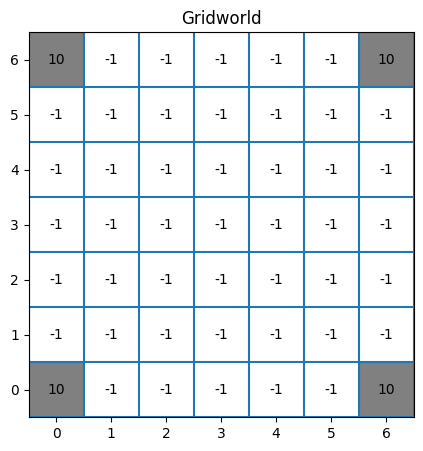

In [6]:
# Defining the number of blocks of a n x n grid 
n = 7

# Defining the value for the hole and the goal
goal = 10
step = -1

# Initiating an empty dataframe of size n x n
G = np.ones((n,n))

# Defining the coordinates of the goal
goal_coords = [(0, n-1), (n-1, 0), (0, 0), (n-1, n-1)]
#goal_coords = [(1, 2)]
# Adding the goal values to the center and the corners
for goal_coord in goal_coords:
    G[goal_coord[0], goal_coord[1]] = goal

# Every other step is -1
G[G == 1] = step

# Converting the G matrix to int 
G = G.astype(int)

plot_matrix(G, goal_coords, title='Gridworld')

In the above diagram, the gridworld is represented as a `n` by `n` matrix. Each cell in it represent the reward you get when you transition to that state. We can call the above matrix as the `reward matrix` and denote it $\mathbb{G}$. Each element in the matrix is a real number: 

$\forall r \in \mathbb{G}, r \in \mathbb{R}$ 

## State matrix

Alongside the $\mathbb{G}$ matrix, we have the the state matrix $\mathbb{S}$.

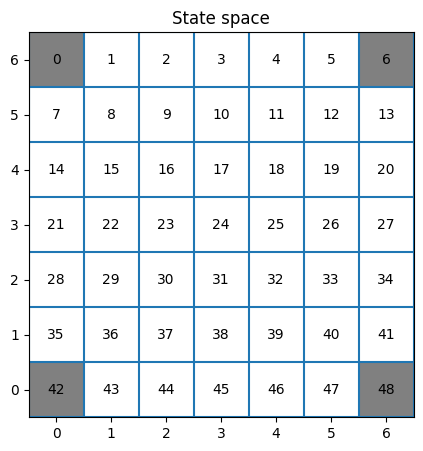

In [7]:
S = np.arange(0, n*n).reshape(n, n)

plot_matrix(S, goal_coords, title='State space')

In [8]:
S

array([[ 0,  1,  2,  3,  4,  5,  6],
       [ 7,  8,  9, 10, 11, 12, 13],
       [14, 15, 16, 17, 18, 19, 20],
       [21, 22, 23, 24, 25, 26, 27],
       [28, 29, 30, 31, 32, 33, 34],
       [35, 36, 37, 38, 39, 40, 41],
       [42, 43, 44, 45, 46, 47, 48]])

- The state matrix is just a matrix whose each element gives an index to the grid an agent is in. 

- For simplicity sake, we tend to flatten these matrices and not keep track of the row and the column indices - just the state numbers. 
- We can always go back to the plot above and check were a certain state is. 

## Policy matrix 

- The policy matrix, denoted as $\mathbb{P}$ is a matrix whose each element is a probability of taking an action in a certain state. 
- In each of the elements of the grid, the values are an array of all the possible actions an agent can take.  

In [9]:
# Saving all the unique states to a vector 
states = np.unique(S)

# Dictionary to hold each action for a given state
P = {}
for s in states: 
    s_dict = {}

    # Checking which index is the current state in the S matrix 
    s_index = np.where(S == s)

    # If the state is in the top left corner, we can only move right and down
    if s_index == (0, 0):
        s_dict['right'] = 0.5
        s_dict['down'] = 0.5
    
    # If the state is in the top right corner, we can only move left and down
    elif s_index == (0, n - 1):
        s_dict['left'] = 0.5
        s_dict['down'] = 0.5
    
    # If the state is in the bottom left corner, we can only move right and up
    elif s_index == (n - 1, 0):
        s_dict['right'] = 0.5
        s_dict['up'] = 0.5
    
    # If the state is in the bottom right corner, we can only move left and up
    elif s_index == (n - 1, n - 1):
        s_dict['left'] = 0.5
        s_dict['up'] = 0.5
    
    # If the state is in the first row, we can only move left, right, and down
    elif s_index[0] == 0:
        s_dict['left'] = 0.333
        s_dict['right'] = 0.333
        s_dict['down'] = 0.333
    
    # If the state is in the last row, we can only move left, right, and up
    elif s_index[0] == n - 1:
        s_dict['left'] =  0.333
        s_dict['right'] = 0.333
        s_dict['up'] = 0.333
    
    # If the state is in the first column, we can only move up, down, and right
    elif s_index[1] == 0:
        s_dict['up'] = 0.333
        s_dict['down'] = 0.333
        s_dict['right'] = 0.333
    
    # If the state is in the last column, we can only move up, down, and left
    elif s_index[1] == n - 1:
        s_dict['up'] = 0.333
        s_dict['down'] = 0.333
        s_dict['left'] = 0.333

    # If the state is in the middle, we can move in all directions
    else:
        s_dict['up'] = 0.25
        s_dict['down'] = 0.25
        s_dict['left'] = 0.25
        s_dict['right'] = 0.25

    # Saving the current states trasition probabilities
    P[s] = s_dict

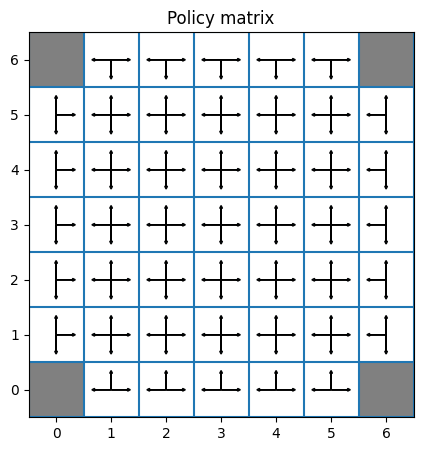

In [10]:
# Drawing a plot for the policy matrix with arrows; In one cell there can be the maximum of 4 arrows each indicating the action an agent can take 
plot_policy_matrix(P, S, goal_coords, title='Policy matrix')

## Value matrix 

- The value matrix is denoted as $\mathbb{V}$. 
- The dimension of the matrix is the same as the state space. 
- Each grid in the value matrix represents the total reward an agent can get if it starts from that state and follows the policy. 

$$v_{\pi} (s) = \mathbb{E}\left[G_{t} | S_{t} = s \right] $$

Where 

$G_{t}$ - total reward an agent gets after taking action `a` in state `s` and following the policy $\pi$ till the end of the episode. The equation for $G_{t}$ is given below.

$$G_{t} = R_{t +1} + \gamma R_{t + 2} + ... + \gamma ^{K} R_{t+K}$$
 
$K$ - the number of steps in the episode.

$$v_{\pi} (s) = \sum_{a \in \mathbb{A}} \left[ \pi(a | s) \sum_{s^{'}, r} p(s^{'}, r | s, a) \left[ r + \gamma v_{\pi} (s^{'}) \right] \right] $$

- This equation is called the Bellman equation.

Where, 

$\pi(a | s)$ is the probability of taking action `a` in state `s`

$p(s^{'}, r | s, a)$ is the probability of transitioning to state `s'` with reward `r` when taking action `a` in state `s`

$\gamma \in (0, 1)$ is the discount factor

$v_{\pi} (s)$ is the value of state `s` under policy $\pi$. 

$r$ - reward for taking action `a` in state `s`. 

- The above equation is a recursive one and could go on forever. 
- In practice, we use a finite number of iterations to calculate the value of each state. 

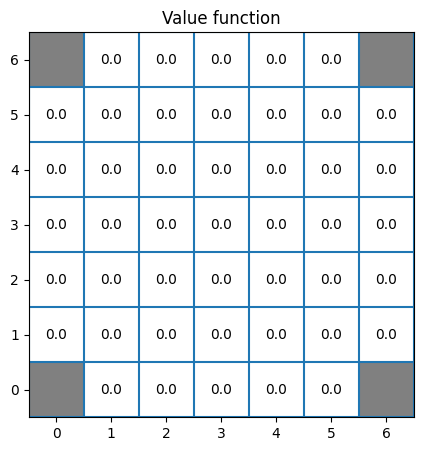

In [11]:
# Initiating the empty Value function 
V = np.zeros((n, n))

plot_matrix(V, goal_coords, title='Value function', annotate_goal=False)

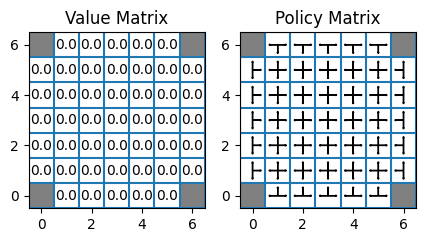

In [12]:
plot_policy_value_matrix(P, S, V, goal_coords, title='Policy value matrix')

# Example - Frozen Lake with Gym

## Creating our first gym environment

- Gym provides a variety of environments for training the reinforcement learning agent. 

- Let's introduce one of the simplest environments called the frozen lake environment. 
- The goal of the agent is to start from the initial state S and reach the goal state G.

- In the frozen lake environment, the following applies:

* S denotes the starting state
* F denotes the frozen state
* H denotes the hole state
* G denotes the goal state

- We need to make sure that the agent starts from S and reaches G without falling into the hole state H as shown below:

- Each grid box in the environment is called state, thus we have 16 states (S to G) and we have 4 possible actions which are up, down, left and right. 
- We learned that our goal is to reach the state G from S without visiting H. So, we assign reward as 0 to all the states and + 1 for the goal state G. 



In [13]:
from IPython.display import Image

Image(url='https://user-images.githubusercontent.com/69793689/234189847-c582581a-2947-4b27-99e8-20b4a51221ed.gif')

In [14]:
# we can create a gym environment using the make function. 
# The make function requires the environment id as a parameter. 
# In the gym, the id of the frozen lake environment is FrozenLake-v0
import gym

env = gym.make("FrozenLake-v1")

In [24]:
# see how our environment looks like using the render function
env.reset()

(0, {'prob': 1})

In [25]:
print(env.observation_space)

Discrete(64)


In [17]:
print(env.action_space)

Discrete(4)


In [18]:
print(env.render())

None


/home/robertomedina/.local/lib/python3.10/site-packages/gym/envs/toy_text/frozen_lake.py:271: UserWarning: WARN: You are calling render method without specifying any render mode. You can specify the render_mode at initialization, e.g. gym("FrozenLake-v1", render_mode="rgb_array")
  logger.warn(


In [19]:
# the environment will save all the frames internally, and you can retrieve all of them at once calling render

env = gym.make("FrozenLake-v1", render_mode="rgb_array_list")

env.reset()

for _ in range(100):
    env.step(env.action_space.sample())

frame_collection = env.render()
env.close()

/home/robertomedina/.local/lib/python3.10/site-packages/gym/utils/passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


In [20]:
frame_collection

[array([[[180, 200, 230],
         [180, 200, 230],
         [180, 200, 230],
         ...,
         [180, 200, 230],
         [180, 200, 230],
         [180, 200, 230]],
 
        [[180, 200, 230],
         [204, 230, 255],
         [204, 230, 255],
         ...,
         [204, 230, 255],
         [204, 230, 255],
         [180, 200, 230]],
 
        [[180, 200, 230],
         [235, 245, 249],
         [204, 230, 255],
         ...,
         [204, 230, 255],
         [204, 230, 255],
         [180, 200, 230]],
 
        ...,
 
        [[180, 200, 230],
         [235, 245, 249],
         [235, 245, 249],
         ...,
         [204, 230, 255],
         [235, 245, 249],
         [180, 200, 230]],
 
        [[180, 200, 230],
         [235, 245, 249],
         [235, 245, 249],
         ...,
         [204, 230, 255],
         [204, 230, 255],
         [180, 200, 230]],
 
        [[180, 200, 230],
         [180, 200, 230],
         [180, 200, 230],
         ...,
         [180, 200, 230],
  

## Transition probability and Reward function

- We can obtain the transition probability and the reward function by just typing `env.P[state][action]` 
- To obtain the transition probability of moving from the state S to the other states by performing an action right, we can type, `env.P[S][right]`.
- To obtain the transition probability of state S by performing an action right, we type `env.P[0][2]` 

In [21]:
print(env.P[0][2])

[(0.3333333333333333, 4, 0.0, False), (0.3333333333333333, 1, 0.0, False), (0.3333333333333333, 0, 0.0, False)]


In [22]:
print(env.P[3][1])

[(0.3333333333333333, 2, 0.0, False), (0.3333333333333333, 7, 0.0, True), (0.3333333333333333, 3, 0.0, False)]


- What does this imply? Our output is in the form of `[(transition probability, next state, reward, Is terminal state?)]`
- It implies that if we perform an action 2 (right) in state 0 (S) then:

* We reach the state 4 (F) with probability 0.33333 and receive 0 reward. 
* We reach the state 1 (F) with probability 0.33333 and receive 0 reward.
* We reach the same state 0 (S) with probability 0.33333 and receive 0 reward.

- Thus, when we type `env.P[state][action]` we get the result in the form of `[(transition probability, next state, reward, Is terminal state?)]`. 
- The last value is the boolean and it implies that whether the next state is a terminal state, since 4, 1 and 0 are not the terminal states it is given as false. 


In [23]:
env = gym.make('FrozenLake8x8-v1', render_mode="ansi")
env.reset()
print(env.render())


SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG

